## 1. Introduction

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.


Nama    : Ali Aufa

Batch   : 7

### Latar Belakang
Blablablabalbalbalola

### Problem Statement
Membuat model yang dapat memprediksi rating pemain FIFA 2022 yang akan digunakan sebagai referensi untuk membuat game FIFA 2025. Model akan dievaluasi dengan mean absolute error agar hasil dapat lebih mudah diinterpretasikan.



## 2. Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Data Loading

>Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.



Dataset diambil dari website sofifa.com yang berisikan statistik pemain di FIFA 2022.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w1/P1W1D1PM%20-%20Machine%20Learning%20Problem%20Framing.csv')
df

,Name,Age,Height,Weight,ValueEUR,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Overall
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               19260 non-null  object
 1   Age                19260 non-null  int64 
 2   Height             19260 non-null  int64 
 3   Weight             19260 non-null  int64 
 4   ValueEUR           19260 non-null  int64 
 5   AttackingWorkRate  19260 non-null  object
 6   DefensiveWorkRate  19260 non-null  object
 7   PaceTotal          19260 non-null  int64 
 8   ShootingTotal      19260 non-null  int64 
 9   PassingTotal       19260 non-null  int64 
 10  DribblingTotal     19260 non-null  int64 
 11  DefendingTotal     19260 non-null  int64 
 12  PhysicalityTotal   19260 non-null  int64 
 13  Overall            19260 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 2.1+ MB


tipe data sudah sesuai untuk dilakukan analisis.

In [4]:
# periksa missing values
df.isna().sum()

Name                 0
Age                  0
Height               0
Weight               0
ValueEUR             0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
Overall              0
dtype: int64

In [5]:
# periksa data duplicate
df.duplicated().sum()

104

terdapat 104 data duplikat yang akan dihapus duplikatnya untuk training machine learning.

In [6]:
# Hapus data duplikat
df.drop_duplicates(inplace=True)

In [7]:
# periksa data duplicate
df.duplicated().sum()

0

In [8]:
df.rename({'ValueEUR': 'Price',
           'Overall': 'Rating'}, axis=1,inplace=True)

In [9]:
df.describe()

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
count,19156.000000,19156.000000,19156.000000,1.915600e+04,19156.000000,19156.000000,19156.000000,19156.000000,19156.000000,19156.000000,19156.000000
mean,25.190750,181.304865,74.953226,2.825776e+06,67.873095,53.499478,57.805857,62.978545,50.012842,64.644968,65.765765
std,4.743117,6.865032,7.068063,7.609954e+06,10.654588,13.806390,9.828530,9.691676,16.367141,9.626229,6.802014
min,16.000000,155.000000,49.000000,0.000000e+00,28.000000,18.000000,25.000000,26.000000,14.000000,29.000000,48.000000
25%,21.000000,176.000000,70.000000,4.750000e+05,62.000000,44.000000,51.000000,58.000000,35.000000,58.000000,61.000000
50%,25.000000,181.000000,75.000000,9.750000e+05,68.000000,56.000000,58.000000,64.000000,54.000000,66.000000,66.000000
75%,29.000000,186.000000,80.000000,2.000000e+06,75.000000,64.000000,64.000000,69.000000,63.000000,72.000000,70.000000
max,54.000000,206.000000,110.000000,1.940000e+08,97.000000,94.000000,93.000000,95.000000,91.000000,92.000000,93.000000


## 4. Exploratary Data Analysis (EDA)

>Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.


GC & milestone > 5-7


> Insight visualisasi / eksplorasi yang bagus
- jelaskan apa yang dapat diidentifikasi dari plot/viz
- kenapa seperti itu
- apa yang dapat dilakukan dari informasi tersebut

<Axes: xlabel='Rating', ylabel='Count'>

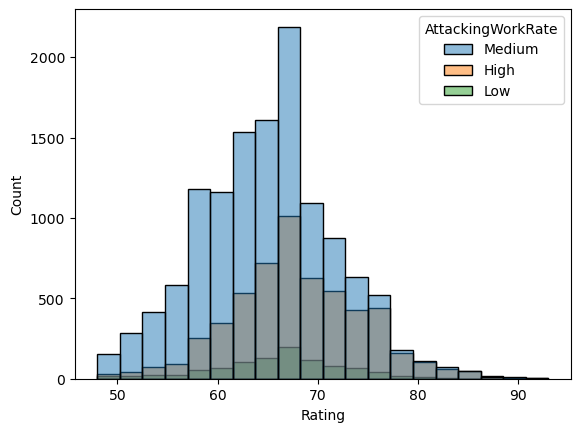

In [10]:
# Bagaimana Distribusi rating pemain FIFA 2022

sns.histplot(data=df, x='Rating', bins=20, hue='AttackingWorkRate')

<Axes: xlabel='Price', ylabel='Rating'>

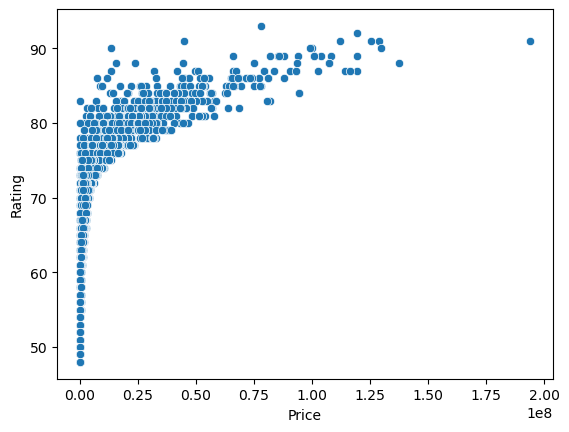

In [11]:
sns.scatterplot(data=df, x='Price', y='Rating')

## 5. Feature Engineering

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.



In [12]:
data = df.copy()

### Split between X (features) and y (Target)

In [13]:
# drop target dari fitur
X = data.drop('Rating', axis=1)

# memilih kolom target
y = data['Rating']

### Split between Train-set and Test-set


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# split antara train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state= 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15324, 13)
(15324,)
(3832, 13)
(3832,)


### Handle Outlier

> akan dijelaskan pada pertemuan rabu

### Handle Missing Value

> akan dijelaskan pada pertemuan Rabu

### Feature Selection

> akan dijelaskan pada pertemuan Rabu
- pearson, spearman, anova, chi square

Berdasarkan pengetahuan, tidak ada hubungannya antara nama dengan rating pemain. Kolom nama akan di hapus dari fitur

> apapun yang dilakukan di train set, lakukan juga di test set.

In [16]:
X_train.drop('Name', axis=1, inplace=True)
X_test.drop('Name', axis = 1, inplace=True)

In [17]:
X_train.columns.tolist()

['Age',
 'Height',
 'Weight',
 'Price',
 'AttackingWorkRate',
 'DefensiveWorkRate',
 'PaceTotal',
 'ShootingTotal',
 'PassingTotal',
 'DribblingTotal',
 'DefendingTotal',
 'PhysicalityTotal']

### Split between Numeric Columns and Category Columns

In [18]:
numerical_columns = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_columns = X_train.select_dtypes(include=object).columns.tolist()

### Feature Scaling

> Jelaskan penggunaan teknik scaling tertentu digunakan terhadap kolom apa saja, dan kenapa

misalkan diidentifikasi bahwa kolom numerik lebih cocok menggunakan minmaxscaler (jelaskan kenapa)

In [19]:
from sklearn.preprocessing import MinMaxScaler #, StandardScaler, RobustScaler

In [20]:
# buat objek scaler
scaler = MinMaxScaler()

# fit terhadap data train yang numerik saja
scaler.fit(X_train[numerical_columns])
# transform terhadap data train yang numerik saja
X_train_scaled = scaler.transform(X_train[numerical_columns])

# transform terhadapt test set yang numerik saja
X_test_scaled = scaler.transform(X_test[numerical_columns])


In [21]:
# memperlihatkan hasil scaling terhadap fitur numerik
pd.DataFrame(X_train_scaled, columns=numerical_columns)

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
0,0.184211,0.431373,0.377049,0.022545,0.955882,0.552632,0.514706,0.661538,0.324675,0.491803
1,0.184211,0.470588,0.377049,0.283636,0.750000,0.736842,0.823529,0.907692,0.714286,0.557377
2,0.394737,0.392157,0.360656,0.004364,0.764706,0.565789,0.470588,0.600000,0.363636,0.524590
3,0.289474,0.529412,0.393443,0.003636,0.750000,0.460526,0.485294,0.584615,0.493506,0.573770
4,0.289474,0.470588,0.426230,0.035636,0.735294,0.671053,0.691176,0.753846,0.506494,0.606557
...,...,...,...,...,...,...,...,...,...,...
15319,0.342105,0.549020,0.508197,0.003636,0.426471,0.434211,0.500000,0.507692,0.610390,0.721311
15320,0.368421,0.411765,0.409836,0.003636,0.514706,0.421053,0.500000,0.584615,0.636364,0.590164
15321,0.342105,0.509804,0.442623,0.010182,0.808824,0.671053,0.544118,0.661538,0.324675,0.540984
15322,0.184211,0.450980,0.295082,0.120000,0.720588,0.671053,0.705882,0.846154,0.428571,0.606557


### Feature Encoding

> jelaskan kenapa pilih teknik encoding tersebut

Karena semua fitur kategori merupakan kategori ordinal, maka akan dilakukan encoding dengan Ordinal Encoder

In [22]:
from sklearn.preprocessing import OrdinalEncoder  ,OneHotEncoder

In [23]:
cat_scale = ['Low', 'Medium', 'High']
encoder = OrdinalEncoder(categories=[cat_scale, cat_scale])

# fit terhadap data train yang ordinal saja
encoder.fit(X_train[categorical_columns])
# transform terhadap data train yang ordinal saja
X_train_encoded = encoder.transform(X_train[categorical_columns])

# transform terhadapt test set yang ordinal saja
X_test_encoded = encoder.transform(X_test[categorical_columns])

In [24]:
pd.DataFrame(X_train_encoded, columns=categorical_columns)

,AttackingWorkRate,DefensiveWorkRate
0,2.0,1.0
1,1.0,1.0
2,1.0,1.0
3,2.0,2.0
4,2.0,2.0
...,...,...
15319,1.0,2.0
15320,1.0,2.0
15321,2.0,0.0
15322,1.0,1.0


### Concate Between Numeric Columns and Categorical Columns

In [25]:
X_train_final = np.concatenate([X_train_scaled, X_train_encoded], axis = 1)

X_test_final = np.concatenate([X_test_scaled, X_test_encoded], axis = 1)

In [26]:
pd.DataFrame(X_train_final, columns=numerical_columns + categorical_columns)

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,AttackingWorkRate,DefensiveWorkRate
0,0.184211,0.431373,0.377049,0.022545,0.955882,0.552632,0.514706,0.661538,0.324675,0.491803,2.0,1.0
1,0.184211,0.470588,0.377049,0.283636,0.750000,0.736842,0.823529,0.907692,0.714286,0.557377,1.0,1.0
2,0.394737,0.392157,0.360656,0.004364,0.764706,0.565789,0.470588,0.600000,0.363636,0.524590,1.0,1.0
3,0.289474,0.529412,0.393443,0.003636,0.750000,0.460526,0.485294,0.584615,0.493506,0.573770,2.0,2.0
4,0.289474,0.470588,0.426230,0.035636,0.735294,0.671053,0.691176,0.753846,0.506494,0.606557,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15319,0.342105,0.549020,0.508197,0.003636,0.426471,0.434211,0.500000,0.507692,0.610390,0.721311,1.0,2.0
15320,0.368421,0.411765,0.409836,0.003636,0.514706,0.421053,0.500000,0.584615,0.636364,0.590164,1.0,2.0
15321,0.342105,0.509804,0.442623,0.010182,0.808824,0.671053,0.544118,0.661538,0.324675,0.540984,2.0,0.0
15322,0.184211,0.450980,0.295082,0.120000,0.720588,0.671053,0.705882,0.846154,0.428571,0.606557,1.0,1.0


## 6. Model Definition

>Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.


- algoritma yang dipakai adalah linear regression karen akita metrics akan diguunakan adalah MAE karena abla bla

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
# buat objek linear regression

model = LinearRegression()

## 7. Model Training

>Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.



In [29]:
# proses training model dengan fit terhadap train set
model.fit(X_train_final, y_train)

LinearRegression()

## 8. Model Evaluation

>Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.



In [30]:
# predict terhadap train set
y_pred_train = model.predict(X_train_final)
# predict terhadap test set
y_pred_test = model.predict(X_test_final)


In [31]:
comparison = X_train
comparison['actual'] = y_train
comparison['prediction'] = y_pred_train
comparison

,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,actual,prediction
6041,23,177,72,3100000,High,Medium,93,60,60,69,39,61,69,66.322686
366,23,179,72,39000000,Medium,Medium,79,74,81,85,69,65,81,83.768438
10029,31,175,71,600000,Medium,Medium,80,61,57,65,42,63,65,66.505871
12532,27,182,73,500000,High,High,79,53,58,64,52,66,63,66.161654
2303,27,179,75,4900000,High,High,78,69,72,75,53,68,74,71.954081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11388,29,183,80,500000,Medium,High,57,51,59,59,61,75,64,67.274776
12068,30,176,74,500000,Medium,High,63,50,59,64,63,67,64,67.497034
5494,29,181,76,1400000,High,Low,83,69,62,69,39,64,69,68.480346
860,23,178,67,16500000,Medium,Medium,77,69,73,81,47,68,77,75.438296


In [32]:
from sklearn.metrics import mean_absolute_error

In [33]:
#Model evaluation using MAE

print('Error - Train set : ', mean_absolute_error(y_train, y_pred_train))
print('Error - Test set : ', mean_absolute_error(y_test, y_pred_test))

Error - Train set :  2.337699147192551
Error - Test set :  2.3642429318595743


Statement??

1. nyatakan apakah model tergolong goodfit, overfit, underfit
2. narasikan hasl bisnis
- jika messi mempunyai ratning 93 maka model akan memprediksi kisaran 91.5 - 95.5, menurut bisnis kira2
3. eksplorasi data aktual dengan data prediksi

In [34]:
print('intercept: ', model.intercept_)
print('Slope: ', model.coef_)

intercept:  37.00784086628377
Slope:  [ 7.68044023  1.72453058  1.01859775 28.85580904  2.8353306   2.74509497
  2.66981168 19.79606748  8.01559382 12.10847438 -0.3078671  -0.51753196]


## 9. Model Saving

>Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.



In [35]:
import pickle
import json

In [36]:
# save model yang udah dibuat
with open('model_linear_regression.pkl', 'wb') as file_1:
    pickle.dump(model, file_1)

# save scaler yang sudah di fit
with open('scaler.pkl', 'wb') as file_2:
    pickle.dump(scaler, file_2)

#  save encoder yang sudah di fit
with open('encoder.pkl', 'wb') as file_3:
    pickle.dump(encoder, file_3)

# save nama kolom
with open('numerical_columns.txt', 'w') as file_4:
    json.dump(numerical_columns, file_4)

with open('categorical_columns.txt', 'w') as file_5:
    json.dump(categorical_columns, file_5)


## 10. kesimpulan
>Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

EDA, model evaluation, model analysis, further improvement

buat kesimpulan dalam paragraf yang concise dan compact